<a href="https://colab.research.google.com/github/ayanoglu/REDGPA/blob/PCA/REDGPAmain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from numpy import array
from sklearn import preprocessing
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=160)
import tensorflow as tf
import csv
import math
import matplotlib.pyplot as plt
from decimal import *
from google.colab import files
import plotly.graph_objects as go
import plotly.express as px
import itertools
from itertools import combinations
import time
from sklearn.metrics import mean_squared_error
import io

uploaded = files.upload()

Saving Survey_numerical_score_GPA.csv to Survey_numerical_score_GPA.csv


In [ ]:
DF = pd.read_csv(io.BytesIO(uploaded['Survey_numerical_score_GPA.csv']), header=None, skip_blank_lines=True)

In [ ]:
DF.head()

In [ ]:
DF.describe()

In [ ]:
DF.isna().sum()

In [ ]:
DF = DF.dropna(axis=1)
DF.isna().sum()
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,6,6,6,6,6,6,7,5,3,3,5,5,6,4,4,6,5,7,6,6,6,3,5,5,4,5,5,5,6,5,5,1,1,1,1,1,3,3,4,1,5,5
1,7,7,6,6,6,7,7,7,5,6,6,2,2,4,7,6,7,7,4,6,5,6,2,2,6,6,6,2,6,4,4,4,7,3,1,4,1,1,4,4,5,2
2,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,6,6,6,1,4,3,5,5,1,1,1,1,4,4,4,2
3,6,6,6,5,6,6,5,7,3,7,4,4,4,3,3,3,7,5,5,5,4,5,4,5,5,5,5,4,4,1,1,1,7,1,1,2,2,2,2,1,4,5
4,6,7,6,6,6,6,7,5,4,3,5,1,1,5,7,7,6,2,2,7,5,4,1,1,6,7,4,5,1,4,4,4,7,1,1,1,1,1,5,4,4,2


In [ ]:
X_norm = X*4/10
X_norm.shape

(187, 42)

In [ ]:
X_norm.skew() # -0.5 to 0.5 values are moderatly skewed, meaning closer to a normal distribution.

In [ ]:
DF2 = pd.concat((X_norm, y), axis = 1)
DF2.shape

(187, 43)

In [ ]:
#train_Input, val_Input, test_input = np.split(DF2, [int(.6 * len(DF2)), int(.8 * len(DF2))])
train_Input, test_input = np.split(DF2, [int(.8 * len(DF2))])

X_train_Input = train_Input.iloc[:,:-1]
y_train= train_Input.iloc[:,-1]
# X_val_Input = val_Input.iloc[:,:-1]
# y_val= val_Input.iloc[:,-1]
X_test_Input = test_input.iloc[:,:-1]
y_test= test_input.iloc[:,-1]

In [ ]:
print(f'Length of training set is', len(X_train_Input))
#print(f'Length of validation set is', len(X_val_Input))
print(f'Length of test set is', len(X_test_Input))

Length of training set is 149
Length of test set is 38


In [ ]:
X_train_Input.shape

(149, 42)

In [ ]:
X_train_Input.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,2.4,2.4,2.4,2.4,2.4,2.4,2.8,2.0,1.2,1.2,2.0,2.0,2.4,1.6,1.6,2.4,2.0,2.8,2.4,2.4,2.4,1.2,2.0,2.0,1.6,2.0,2.0,2.0,2.4,2.0,2.0,0.4,0.4,0.4,0.4,0.4,1.2,1.2,1.6,0.4,2.0,2.0,NaN
1,2.8,2.8,2.4,2.4,2.4,2.8,2.8,2.8,2.0,2.4,2.4,0.8,0.8,1.6,2.8,2.4,2.8,2.8,1.6,2.4,2.0,2.4,0.8,0.8,2.4,2.4,2.4,0.8,2.4,1.6,1.6,1.6,2.8,1.2,0.4,1.6,0.4,0.4,1.6,1.6,2.0,0.8,NaN
2,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.8,2.4,2.4,2.4,0.4,1.6,1.2,2.0,2.0,0.4,0.4,0.4,0.4,1.6,1.6,1.6,0.8,NaN
3,2.4,2.4,2.4,2.0,2.4,2.4,2.0,2.8,1.2,2.8,1.6,1.6,1.6,1.2,1.2,1.2,2.8,2.0,2.0,2.0,1.6,2.0,1.6,2.0,2.0,2.0,2.0,1.6,1.6,0.4,0.4,0.4,2.8,0.4,0.4,0.8,0.8,0.8,0.8,0.4,1.6,2.0,NaN
4,2.4,2.8,2.4,2.4,2.4,2.4,2.8,2.0,1.6,1.2,2.0,0.4,0.4,2.0,2.8,2.8,2.4,0.8,0.8,2.8,2.0,1.6,0.4,0.4,2.4,2.8,1.6,2.0,0.4,1.6,1.6,1.6,2.8,0.4,0.4,0.4,0.4,0.4,2.0,1.6,1.6,0.8,NaN


In [ ]:
X_All_Input = DF2.iloc[:,:-1]
y_All= DF2.iloc[:,-1]

In [ ]:
cormat = X_All_Input.corr()
round(cormat,2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,1.00,0.60,0.54,0.67,0.74,0.49,0.44,0.14,0.06,0.09,0.02,-0.02,0.06,0.19,0.21,0.27,0.13,0.03,0.17,0.22,0.18,-0.03,0.17,0.20,0.14,0.02,0.28,-0.10,-0.06,-0.01,0.01,0.01,0.07,-0.01,-0.06,0.01,-0.04,0.11,0.27,-0.09,0.03,-0.03
1,0.60,1.00,0.63,0.62,0.57,0.32,0.39,0.14,0.08,-0.01,0.04,-0.07,0.01,0.08,0.23,0.36,0.18,0.03,0.02,0.23,0.08,-0.08,0.14,0.09,0.04,-0.02,0.15,-0.14,-0.10,-0.02,-0.00,-0.08,-0.03,0.04,-0.05,0.04,0.02,0.09,0.20,0.03,0.05,-0.05
2,0.54,0.63,1.00,0.52,0.37,0.41,0.36,0.14,0.04,0.11,0.01,0.08,0.11,0.07,0.13,0.24,0.12,0.04,0.14,0.18,0.07,-0.05,0.15,0.08,0.15,0.02,0.11,-0.10,-0.08,0.00,0.00,0.02,0.01,0.06,0.08,0.01,0.00,0.05,0.17,0.03,0.06,-0.12
3,0.67,0.62,0.52,1.00,0.73,0.55,0.39,0.13,0.05,0.14,0.07,0.09,0.15,0.19,0.25,0.25,0.07,0.07,0.18,0.15,0.13,-0.07,0.19,0.11,0.09,0.02,0.25,-0.09,-0.12,-0.02,0.00,0.05,0.06,0.01,0.02,0.01,-0.00,-0.03,0.32,0.05,0.01,-0.14
4,0.74,0.57,0.37,0.73,1.00,0.52,0.42,0.19,-0.02,0.13,0.04,0.09,0.17,0.18,0.36,0.31,0.17,0.01,0.19,0.28,0.22,-0.10,0.24,0.24,0.17,0.10,0.31,-0.19,-0.08,0.03,0.04,0.03,0.08,0.01,-0.03,0.04,0.04,0.13,0.32,-0.03,0.01,-0.05
5,0.49,0.32,0.41,0.55,0.52,1.00,0.36,0.10,0.06,0.12,0.04,0.12,0.20,0.14,0.11,0.08,0.06,0.13,0.22,0.08,0.23,-0.02,0.22,0.16,0.17,-0.01,0.07,0.01,-0.04,0.02,0.01,0.19,0.07,0.07,0.04,0.04,-0.07,0.03,0.21,-0.02,-0.04,-0.20
6,0.44,0.39,0.36,0.39,0.42,0.36,1.00,0.10,0.06,0.06,0.02,0.02,0.09,0.13,0.25,0.25,0.14,-0.02,0.21,0.35,0.22,-0.06,0.21,0.19,0.16,-0.01,0.19,-0.19,-0.03,0.07,0.07,0.03,0.04,0.06,-0.01,0.01,0.09,0.11,0.31,0.01,0.04,0.02
7,0.14,0.14,0.14,0.13,0.19,0.10,0.10,1.00,-0.12,0.38,-0.04,0.12,0.23,-0.35,0.13,0.09,0.68,0.03,0.09,0.06,0.17,-0.04,0.26,0.27,0.16,0.11,0.03,0.06,0.05,-0.04,-0.07,0.05,-0.07,0.11,0.00,-0.05,-0.00,0.01,-0.05,-0.01,0.03,-0.10
8,0.06,0.08,0.04,0.05,-0.02,0.06,0.06,-0.12,1.00,-0.41,0.51,-0.19,-0.28,0.23,-0.11,-0.14,-0.19,0.23,-0.05,-0.13,-0.13,0.40,-0.14,-0.12,-0.02,-0.09,-0.10,0.34,0.17,0.15,0.05,-0.12,0.12,0.17,0.09,0.08,-0.00,0.06,0.01,-0.04,-0.11,0.02
9,0.09,-0.01,0.11,0.14,0.13,0.12,0.06,0.38,-0.41,1.00,-0.16,0.40,0.47,-0.06,0.17,0.16,0.40,-0.03,0.30,0.12,0.30,-0.10,0.27,0.30,0.20,0.11,0.16,-0.03,0.06,-0.01,-0.01,0.19,-0.07,0.13,0.18,0.18,0.14,0.11,0.04,-0.03,-0.05,-0.10


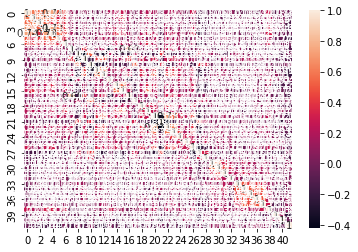

In [ ]:
import seaborn as sns
sns.heatmap(cormat, annot=True);

In [ ]:
X_All_Input.corr().unstack().sort_values().drop_duplicates()

21  22   -0.420316
8   9    -0.410513
21  20   -0.375537
7   13   -0.354303
26  27   -0.295811
            ...   
16  7     0.681993
22  20    0.714307
3   4     0.730985
4   0     0.736461
0   0     1.000000
Length: 862, dtype: float64

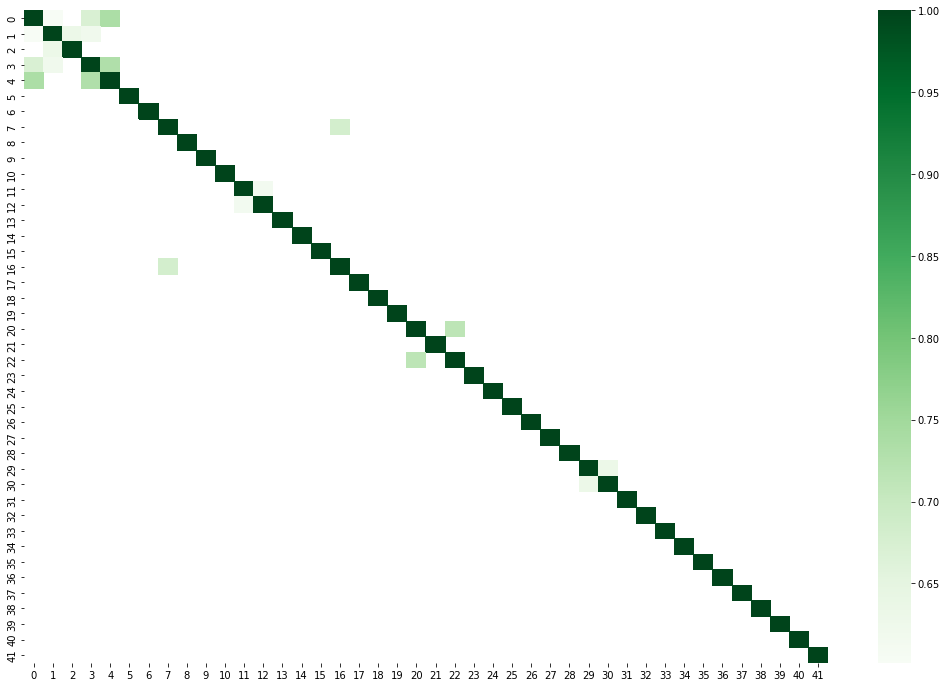

In [ ]:
kot = cormat[cormat>=.6]
plt.figure(figsize=(18,12))
sns.heatmap(kot, cmap="Greens")

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_All_Input)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, y_All], axis = 1)

In [ ]:
fig = px.scatter(data_frame= finalDf, x = 'principal component 1', y='principal component 2', title = "PCA" )
fig.show()